In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Dense, Flatten, Dropout, BatchNormalization, Reshape, LeakyReLU, Input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [70]:
data = keras.datasets.mnist.load_data()

In [71]:
(x_train, y_train), (x_valid, y_valid) = data

In [72]:
x_train = pd.DataFrame(x_train.reshape(60000, 784))

In [253]:
x_3 = x_train[y_train  == 3]
y_3 = y_train[y_train == 3]
y_3 = pd.Series(y_3)

In [254]:
x_7 = x_train[y_train == 7]
y_7 = y_train[y_train == 7]
y_7 = pd.Series(y_7)

In [255]:
x_data = pd.DataFrame(x_3).reset_index(drop=True) / 127.5 -1
x_test = pd.DataFrame(x_7).reset_index(drop=True) / 127.5 -1

In [256]:
x_data

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6126,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6127,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6128,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6129,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [257]:
df_shuffled=x_data.sample(frac=1)
df_shuffled

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
1132,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3550,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5217,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
121,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
779,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2031,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1140,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
227,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3862,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [258]:
df = df_shuffled.values.reshape(6131, 28, 28, 1)

In [139]:
encoder_input = Input(shape=(28, 28, 1))

# 28 X 28
x = Conv2D(32, 3, padding='same')(encoder_input) 
x = BatchNormalization()(x)
x = LeakyReLU()(x) 

# 28 X 28 -> 14 X 14
x = Conv2D(64, 3, strides=2, padding='same')(x)
x = BatchNormalization()(x) 
x = LeakyReLU()(x) 

# 14 X 14 -> 7 X 7
x = Conv2D(64, 3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

# 2D 좌표로 표기하기 위하여 2를 출력값으로 지정합니다.
x = Conv2DTranspose(64, 3, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)
x= Dense(2)(x)
x = BatchNormalization()(x)

x = Dense(7*7*64)(x)
x = BatchNormalization()(x)
x = Reshape( (7, 7, 64))(x)
# 7 X 7 -> 14 X 14


x = Conv2DTranspose(64, 3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

# 14 X 14 -> 28 X 28
x = Conv2DTranspose(64, 3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

# 28 X 28 -> 28 X 28
x = Conv2DTranspose(32, 3, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

# 최종 output
decoder_output = Conv2DTranspose(1, 3, strides=1, padding='same', activation='tanh')(x)

In [140]:
ae = Model(encoder_input, decoder_output)
ae.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_74 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
leaky_re_lu_68 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_75 (Batc (None, 14, 14, 64)        256       
_________________________________________________________________
leaky_re_lu_69 (LeakyReLU)   (None, 14, 14, 64)        0  

In [141]:
model2 = Model(inputs=ae.inputs, outputs=ae.layers[14].output)
model2.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_74 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
leaky_re_lu_68 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_75 (Batc (None, 14, 14, 64)        256       
_________________________________________________________________
leaky_re_lu_69 (LeakyReLU)   (None, 14, 14, 64)        0  

In [142]:
ae.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss=tf.keras.losses.MeanAbsoluteError())

In [143]:
ae.fit(df, df, 
                 batch_size=32, 
                 epochs=100,
                )

Epoch 1/100
192/192 [==============================] - 1s 7ms/step - loss: 0.2882
Epoch 2/100
192/192 [==============================] - 1s 7ms/step - loss: 0.2831
Epoch 3/100
192/192 [==============================] - 1s 7ms/step - loss: 0.2062
Epoch 4/100
192/192 [==============================] - 1s 7ms/step - loss: 0.1741
Epoch 5/100
192/192 [==============================] - 1s 7ms/step - loss: 0.1726
Epoch 6/100
192/192 [==============================] - 1s 7ms/step - loss: 0.1708
Epoch 7/100
192/192 [==============================] - 1s 7ms/step - loss: 0.1700
Epoch 8/100
192/192 [==============================] - 1s 7ms/step - loss: 0.1697
Epoch 9/100
192/192 [==============================] - 1s 7ms/step - loss: 0.1693
Epoch 10/100
192/192 [==============================] - 1s 7ms/step - loss: 0.1695
Epoch 11/100
192/192 [==============================] - 1s 7ms/step - loss: 0.1691
Epoch 12/100
192/192 [==============================] - 1s 7ms/step - loss: 0.1684
Epoch 13/100


In [259]:
predict = ae.predict(df)

In [260]:
predict = predict.reshape(6131, 28, 28)

In [261]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [262]:
mean_absolute_error(df.reshape(6131, 784), predict.reshape(6131, 784))

0.1561136540150093

In [263]:
import tensorflow as tf
train_loss = tf.keras.losses.mse(predict.reshape(6131, 784), df.reshape(6131, 784))

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

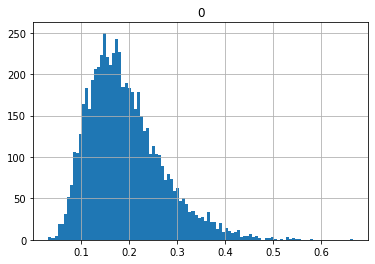

In [264]:
pd.DataFrame(train_loss).hist(bins = 100)

In [269]:
x_test.shape

(6265, 784)

In [271]:
x_test = x_test.values.reshape(6265, 28, 28)

In [272]:
tmp = ae.predict(x_test)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

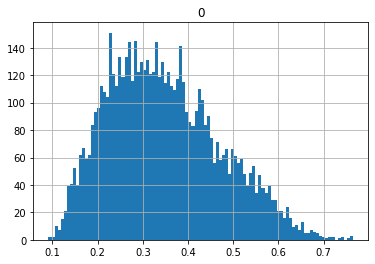

In [275]:
mean_absolute_error(x_test.reshape(6265, 784), tmp.reshape(6265, 784))
train_loss = tf.keras.losses.mse(x_test.reshape(6265, 784), tmp.reshape(6265, 784))
pd.DataFrame(train_loss).mean()
pd.DataFrame(train_loss).hist(bins = 100)

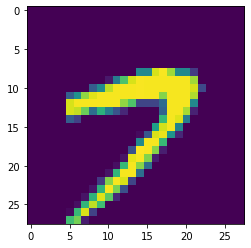

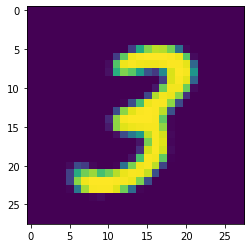

In [274]:
plt.imshow(x_test[8].reshape(28, 28))
plt.show()
plt.imshow(tmp[8].reshape(28, 28))
plt.show()

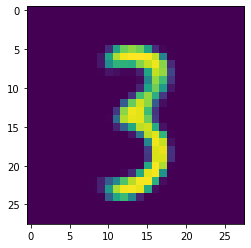

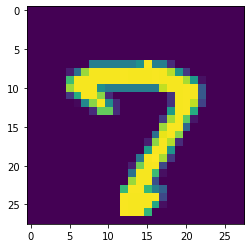

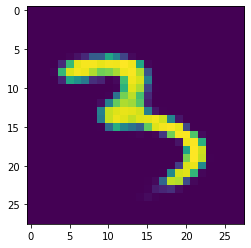

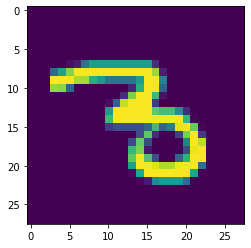

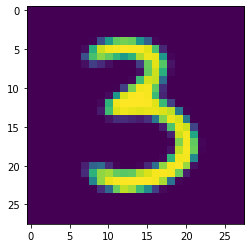

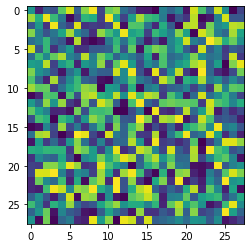

In [240]:
i = np.random.choice(10)
plt.imshow(ae.predict(x_test[i].reshape(1, 28, 28, 1)).reshape(28, 28))
plt.show()
plt.imshow(x_test[i].reshape(28, 28,1))
plt.show()
plt.imshow(ae.predict(x_data.iloc[i, :].values.reshape(1, 28, 28, 1)).reshape(28, 28))
plt.show()

plt.imshow(x_data.iloc[i, :].values.reshape(28, 28,1))
plt.show()

plt.imshow(ae.predict(np.random.rand(28, 28).reshape(1, 28, 28, 1)).reshape(28, 28))
plt.show()

plt.imshow(np.random.rand(28, 28))

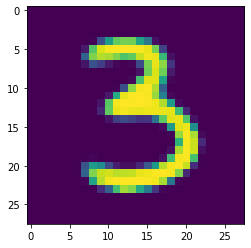

2.0072105734358026

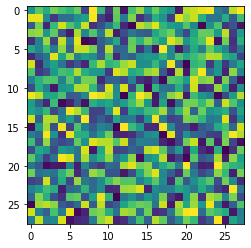

In [251]:
ra = np.random.rand(28, 28)
plt.imshow(ae.predict(ra.reshape(1, 28, 28, 1)).reshape(28, 28))
plt.show()

plt.imshow(ra)

train_loss = tf.keras.losses.mse(ae.predict(ra.reshape(1, 28, 28, 1)).reshape(28, 28), ra)
train_loss.numpy().mean()